download this file: https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

strip the header and footer, convert it to hdf5, renamed to "mamajek-spectral-class.hdf5"
Save into `/Data` directory.

This table can be used to classify the spectral class of the stars.

In [48]:
import vaex 
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from scipy import stats

In [2]:
root_dir = abspath(join(".."))
if root_dir not in sys.path:
    sys.path.append(root_dir)

sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import style, load_spectral_types, safe_mkdir, hdi_sample
style("seaborn-bright", tex=True)

In [4]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
data_dir = join(root_data_dir, "Color")
safe_mkdir(data_dir)
data_dir

Directory /home2/s20321005/Thesis-Project/Data/Color already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Color'

In [6]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5")) 
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5']

In [7]:
# load best pars data
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

In [8]:
df_spec = load_spectral_types()
df_spec

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [9]:
# save classification values into numpy array
jk_spec = df_spec["J-K"].to_numpy()
Mj_spec = df_spec["M_J"].to_numpy()
# cut it below M_J < 5
check = (Mj_spec < 5)*(jk_spec > -0.02)
jk_spec = jk_spec[check]
Mj_spec = Mj_spec[check]

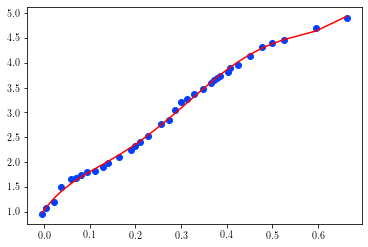

In [323]:
from scipy import interpolate

Mj_interp = interpolate.UnivariateSpline(jk_spec, Mj_spec, s=2, k=5)

plt.scatter(jk_spec, Mj_spec)
plt.plot(jk_spec, Mj_interp(jk_spec), c="r")


In [344]:
jk = df['JK'].to_numpy().copy()
Mj = df['M_J'].to_numpy().copy()


In [345]:
jk_unique = np.unique(np.sort(jk))
delta_jk = np.min(np.diff(jk_unique))*0.1
delta_jk

# plt.hist(np.diff(jk_unique), bins=50);

5.960464477539063e-09

In [346]:
Mj_unique = np.unique(np.sort(Mj))
delta_Mj = np.min(np.diff(Mj_unique))*0.1
delta_Mj

1.5853984791647235e-13

In [347]:
jk += stats.norm.rvs(size=len(jk), loc=0, scale=delta_jk)
Mj += stats.norm.rvs(size=len(jk), loc=0, scale=delta_Mj)

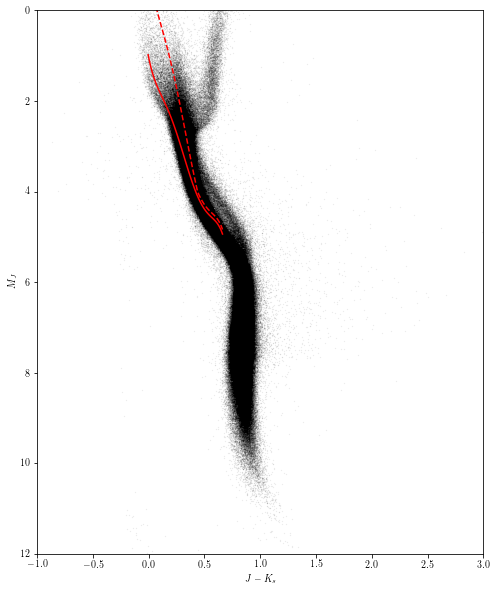

In [348]:
jk_samples = np.linspace(jk_spec.min(), jk_spec.max(), 100)

def upper_boundary(t, jk):
    a = np.maximum(((0.6-jk)/0.2)**2*0.3, 0.0)
    b = np.minimum(((0.3-jk)/0.1)**2*0.1, a)
    return t + a - b

# HR diagram
plt.figure(figsize=(8,10))
plt.scatter(jk, Mj, c="k", alpha=0.1, s=0.1)
plt.plot(jk_samples, Mj_interp(jk_samples), c="r")
plt.plot(jk_samples, Mj_interp(jk_samples)-upper_boundary(0.1, jk_samples), c="r", ls="dashed")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-1, 3)
plt.ylim(0, 12)
plt.gca().invert_yaxis()
plt.show()

In [16]:
# from tqdm import tqdm

# # jk_samples = np.linspace(jk_spec.min(), jk_spec.max(), 10_000)
# jk_mids = []
# Mj_highs = []
# Mj_lows = []
# n_invervals = []

# delta_jk = 0.01

# jk_low = jk_samples.min() 
# jk_high = jk_low + delta_jk

# jk = df['JK'].to_numpy()
# Mj = df['M_J'].to_numpy()
# mask = 

# while jk_high < 

# # count = 0
# for jk_high in jk_samples:
#     mask = (jk > jk_low)*(jk < jk_high)
#     Mj_mask = Mj[mask]
#     if len(Mj_mask) > 1000:
#         jk_mid = (jk_low + jk_high)/2
#         hpd, _ = hdi_sample(Mj_mask, low=-1, high=5, alpha=0.20)
#         low, high = hpd[0]
#         jk_mids.append(jk_mid)
#         Mj_highs.append(high)
#         Mj_lows.append(low)
#         n_invervals.append(len(Mj_mask))
#         jk_low = jk_high

100%|██████████| 10000/10000 [00:27<00:00, 364.43it/s]


In [349]:
mask = (jk > -0.02)*(jk < 0.6)
jk_mask = jk[mask]
Mj_mask = Mj[mask]


In [350]:
indices = np.argsort(jk_mask)
jk_sorted = jk_mask[indices]
Mj_sorted = Mj_mask[indices]

In [351]:
from tqdm import tqdm

i_bound = np.arange(0, len(jk_mask), 1001).astype(int)
i_bound = np.append(i_bound, len(jk_mask)-1)

Mj_highs = []
Mj_lows = []
n_invervals = []

jk_lows = jk_sorted[i_bound[:-1]]
jk_highs = jk_sorted[i_bound[1:]]
jk_mids = (jk_lows + jk_highs)/2

for jk_low, jk_high in zip(jk_lows, tqdm(jk_highs)):
    mask = (jk_mask > jk_low)*(jk_mask < jk_high)
    Mj_sub = Mj_mask[mask]
    hpd, _ = hdi_sample(Mj_sub, low=-1, high=5, alpha=0.20)
    low, high = hpd[0]
    Mj_highs.append(high)
    Mj_lows.append(low)

100%|█████████▉| 249/250 [00:11<00:00, 21.79it/s]


In [17]:
# plt.figure(figsize=(7,4))
# plt.hist(mj_s, bins=50, alpha=0.5, edgecolor='k')
# plt.axvline(low, c="r")
# plt.axvline(high, c="r")
# plt.xlabel(r"$M_J$")
# plt.ylabel("Jumlah")
# plt.title(r"${:.3f} < J-K_s < {:.3f}$".format(b0, b1))
# # plt.savefig(join("..", "img", "mj-hist.pdf"), dpi=70)
# plt.show()

In [352]:
Mj_high_interp = interpolate.UnivariateSpline(jk_mids, Mj_highs, s=1, k=3)
Mj_low_interp = interpolate.UnivariateSpline(jk_mids, Mj_lows, s=1, k=3)

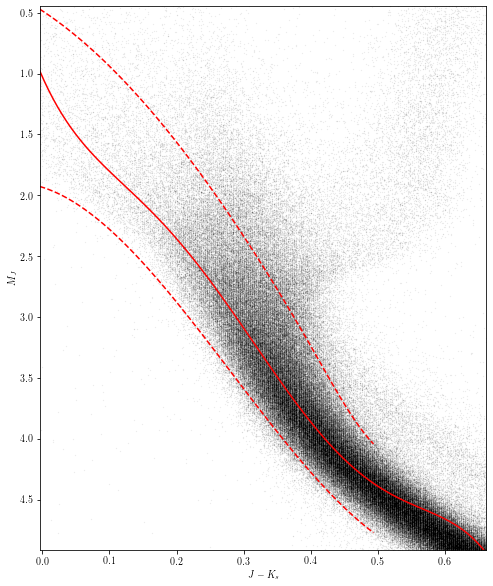

In [353]:
jk_samples = np.linspace(jk_spec.min(), jk_spec.max(), 100)

plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.plot(jk_samples, Mj_interp(jk_samples), c="r")
mask = jk_samples < 0.5
plt.plot(jk_samples[mask], Mj_high_interp(jk_samples[mask]), c="r", ls="--")
plt.plot(jk_samples[mask], Mj_low_interp(jk_samples[mask]), c="r", ls="--")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(jk_spec.min(), jk_spec.max())
plt.ylim(Mj_spec.min()-0.5, Mj_spec.max())
plt.gca().invert_yaxis()
plt.show()

In [354]:
B9 = df_spec[df_spec["SpT"] == "B9V"]['J-K'].to_numpy()[0]
A0 = df_spec[df_spec["SpT"] == "A0V"]['J-K'].to_numpy()[0]
BA = (B9+A0)/2

A9 = df_spec[df_spec["SpT"] == "A9V"]['J-K'].to_numpy()[0]
F0 = df_spec[df_spec["SpT"] == "F0V"]['J-K'].to_numpy()[0]
AF = (A9+F0)/2

F9 = df_spec[df_spec["SpT"] == "F9V"]['J-K'].to_numpy()[0]
G0 = df_spec[df_spec["SpT"] == "G0V"]['J-K'].to_numpy()[0]
FG = (F9+G0)/2

# G9 = df_spec[df_spec["SpT"] == "G9V"]['J-K'].to_numpy()[0]
# K0 = df_spec[df_spec["SpT"] == "K0V"]['J-K'].to_numpy()[0]
# GK = (G9+K0)/2
G3 = df_spec[df_spec["SpT"] == "G3V"]['J-K'].to_numpy()[0]
G4 = df_spec[df_spec["SpT"] == "G4V"]['J-K'].to_numpy()[0]
GG = (G3+G4)/2

BA, AF, FG, GG
# GK

(-0.019000000000000003, 0.1355, 0.314, 0.376)

In [355]:
jk_low = BA
jk_up = GG # GK
df_mask = df.filter(f"JK < {jk_up}").filter(f"JK > {jk_low}").filter("w > -9999")
df_mask = df_mask.extract()
df_mask["M_J_lower"] = Mj_low_interp(df_mask["JK"].to_numpy())
df_mask["M_J_upper"] = Mj_high_interp(df_mask["JK"].to_numpy())
df_mask = df_mask.filter("M_J > M_J_lower").filter("M_J < M_J_upper")
df_mask = df_mask.extract()
jk_unique = np.unique(np.sort(df_mask["JK"].to_numpy()))
delta_jk = np.min(np.diff(jk_unique))*0.1
Mj_unique = np.unique(np.sort(df_mask["M_J"].to_numpy()))
delta_Mj = np.min(np.diff(Mj_unique))*0.1

df_mask["JK"] = df_mask["JK"].to_numpy() + stats.norm.rvs(size=len(df_mask), loc=0, scale=delta_jk)
df_mask["M_J"] = df_mask["M_J"].to_numpy() + stats.norm.rvs(size=len(df_mask), loc=0, scale=delta_Mj)
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.0032882177640498373,-1.2621910830881986,7.800000190734863,7.5970001220703125,AAA,4701758461948318848,20.87449836730957,-16.354367148195085,0.01471635326743126,12.9722529499503,0.016420288011431694,8.410454649576556,0.012681514024734497,8.464082717895508,8.652515411376953,8.128384590148926,1851.48095703125,3608.023681640625,0.9388912916183472,1.18311607837677,2.238763800213232,-0.7728458234774394,118.52539825439453,117.81610107421875,118.82469940185547,0.002099999925121665,0.0003000000142492354,0.01730000041425228,nan,nan,nan,F,00004521-7219055,1,111,--,-1.0309404134750366,apogee,0.07304781675338745,0.07304781675338745,1.0,6724.49755859375,gspphot,3.4951171875,30.11328125,0.0,4.15500020980835,gspphot,0.0029001235961914062,0.013399600982666016,0.0,-0.10700999945402145,apogee,0.005179196130484343,0.005179196130484343,1.0,-0.09715799987316132,apogee,0.0066741290502250195,0.0066741290502250195,1.0,0.699999988079071,gspspec,0.039999961853027344,0.030000030994415283,0.0,-0.036324698477983475,apogee,0.01035263016819954,0.01035263016819954,1.0,0.2030000554050712,2.424097557624472,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,0.07304781675338745,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.5836466435307257,2.895371402722622
1,0.0071074868596039875,-1.2273890258172142,8.6899995803833,8.392999649047852,AAA,4702959678401321984,37.18967056274414,23.58711228133474,0.011803952045738697,-28.752733940266236,0.014449707232415676,8.74803741556182,0.012488438747823238,9.653302192687988,9.947792053222656,9.193760871887207,2110.06494140625,3865.70654296875,0.910544216632843,1.1956642866134644,2.2506821387235147,-0.8066398204825131,114.01460266113281,113.83480072021484,114.20709991455078,0.0008999999845400453,0.00019999999494757503,0.002400000113993883,-0.05000000074505806,-0.17000000178813934,0.05999999865889549,G,00013773-7019271,1,112,--,24.771608352661133,gaia,0.21023516356945038,0.21023516356945038,1.0,5889.33837890625,gspphot,1.6259765625,2.79736328125,0.0,4.333700180053711,gspphot,0.0020003318786621094,0.00189971923828125,0.0,nan,--,nan,nan,nan,-0.0892999991774559,gspphot,0.004799999296665192,0.00469999760389328,0.0,0.09000000357627869,gspspec,0.01000000536441803,0.019999995827674866,0.0,nan,--,nan,nan,nan,0.29699995775995075,3.39955273964416,114.31135379246405,-82.528939581882,79.0952573632323,-30.63629306822048,21.082910658875736,0.012028147818888,0.014263624470926195,0.21023516356945038,11.423476121089848,-16.599840883743973,0.018046473993364308,-0.024577299313449357,-9.98003914268823,0.15229546180753484,25.38754036485519,0.14604996247002744,-28.87002922881429,0.09379022174407457,-9.306091310006478,0.11462124359924132,2.308681566808076,3.5631010464447677
2,0.00791300866927693,-1.1886556144061122,8.053999900817871,7.76800012588501,AAA,4706617135111506560,106.13522338867188,100.67758019494745,0.012745832093060017,-33.59629691075584,0.01461782120168209,8.819245685888635,0.012825272046029568,8.9214382171630

In [356]:
len(df.filter("abs(z) < 200").filter(f"JK < {jk_up}").filter(f"JK > {jk_low}")), len(df_mask.filter("abs(z) < 200"))

(63023, 50590)

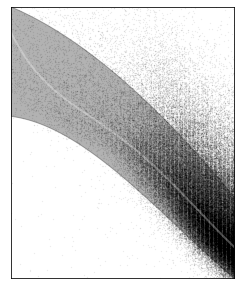

In [357]:
jk_samples = np.linspace(jk_low, jk_up, 100)

plt.figure(figsize=(4,5))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.fill_between(jk_samples, Mj_high_interp(jk_samples), Mj_low_interp(jk_samples), color="k", alpha=0.3)
plt.plot(jk_samples, Mj_interp(jk_samples), c="white", alpha=0.3, lw=2)
plt.xlabel("")
plt.ylabel("")
plt.xlim(jk_low, jk_up)
plt.ylim(Mj_low_interp(jk_samples).min(), Mj_high_interp(jk_samples).max())
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.savefig(join("img", "hrd-plot-only.png"), dpi=300)
plt.show()

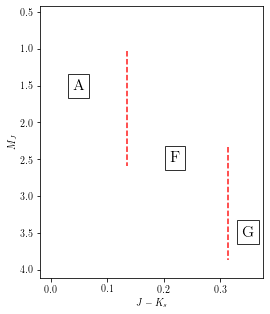

In [358]:
jk_samples = np.linspace(jk_low, jk_up, 100)

a_pos = 0.05
f_pos = 0.22
g_pos = 0.35

plt.figure(figsize=(4,5))
# df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
# plt.fill_between(jk_samples, Mj_high_interp(jk_samples), Mj_low_interp(jk_samples), color="k", alpha=0.3)

plt.plot(jk_samples, Mj_interp(jk_samples), c="white", alpha=0.3, lw=2)
plt.vlines(x=AF, ymin=Mj_low_interp(AF)*0.9, ymax=Mj_high_interp(AF)*1.05, color="red", ls="dashed", alpha=0.9)
plt.vlines(x=FG, ymin=Mj_low_interp(FG)*0.95, ymax=Mj_high_interp(FG)*1.05, color="red", ls="dashed", alpha=0.9)
plt.text(a_pos, Mj_interp(a_pos), "A", size=16, 
        ha="center", va="center",
        bbox=dict(boxstyle="square",
                  fc=(1., 1., 1.),
                  ec=(.2, .2, .2)
        )
)
plt.text(f_pos, Mj_interp(f_pos), "F", size=16, 
        ha="center", va="center",
        bbox=dict(boxstyle="square",
                  fc=(1., 1., 1.),
                  ec=(.2, .2, .2)
        )
)
plt.text(g_pos, Mj_interp(g_pos), "G", size=16, 
        ha="center", va="center",
        bbox=dict(boxstyle="square",
                  fc=(1., 1., 1.),
                  ec=(.2, .2, .2)
        )
)
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(jk_low, jk_up)
plt.ylim(Mj_low_interp(jk_samples).min(), Mj_high_interp(jk_samples).max())
plt.gca().invert_yaxis()
plt.savefig(join("img", "hrd-label-only.pdf"), dpi=70)
plt.show()

check the midplane

In [359]:
df_mid = df_mask.filter("abs(z) < 50")
df_mid = df_mid.extract()
df_mid

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.010886019970416593,0.14809881412055007,5.077000141143799,4.909999847412109,AAA,2746883550050748288,104.96347045898438,-93.86709820610827,0.07529714703559875,-46.97124474797831,0.059896424412727356,26.626807289488895,0.05965271592140198,5.635739326477051,5.781437397003174,5.3413615226745605,1286.078125,701.5516357421875,0.9138281345367432,1.186178207397461,-1.3472591136581011,-0.9156625705105482,37.73139953613281,37.65380096435547,37.8203010559082,0.0,0.0,9.999999747378752e-05,nan,nan,nan,F,00022969+0829075,1,111,--,10.91873836517334,gaia,0.13661456108093262,0.13661456108093262,1.0,7074.23486328125,gspphot,1.42138671875,1.4833984375,0.0,4.057000160217285,gspphot,0.0036001205444335938,0.00279998779296875,0.0,nan,--,nan,nan,nan,-0.7408999800682068,gspphot,0.023200035095214844,0.010899960994720459,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.16700030846236366,2.203595616685212,37.55613615736636,-29.780755668887814,22.88165105189412,-103.79716075576094,-15.603825744104398,0.07396018137361994,0.06153969109697727,0.13661456108093262,-2.777731976009451,-18.477564231913245,-0.012599176705186203,-0.043439096225776214,-10.350568855849389,0.10860238843004742,4.449760305676502,0.08383196753192353,19.00425552701665,0.04625567004234596,0.2429374123330339,0.08231140170182588,1.3396920276741957,2.6589442010114928
1,0.01351256596174286,0.5562382128464298,7.684999942779541,7.382999897003174,AAA,2873571753703279360,12.40060806274414,10.265181659269848,0.022076956927776337,-6.9570910337692,0.011609489098191261,13.10471597581109,0.02095140889286995,8.624852180480957,8.894630432128906,8.179407119750977,5522.19970703125,3433.3466796875,1.0916849374771118,1.200102686882019,-1.2025710408995658,-0.5216512633873294,76.02010345458984,75.89620208740234,76.1427001953125,0.00019999999494757503,0.0,0.0005000000237487257,-0.07999999821186066,-0.18000000715255737,-0.0,F,00030581+3152123,1,111,--,-20.72557258605957,gaia,0.22530630230903625,0.22530630230903625,1.0,5996.29931640625,gspphot,1.02392578125,1.171875,0.0,4.252699851989746,gspphot,0.0019998550415039062,0.0020999908447265625,0.0,nan,--,nan,nan,nan,-0.41850000619888306,gspphot,0.005899995565414429,0.0056999921798706055,0.0,0.18000000715255737,gspspec,0.02000001072883606,0.009999990463256836,0.0,nan,--,nan,nan,nan,0.30200008822324065,3.272138006443796,76.30840697698578,-38.02542983277274,66.15919937089754,8.530093419999593,-9.000698661550752,0.021704949667756483,0.012290948874357548,0.22530630230903625,-3.2555693488129958,3.085350562761478,-0.006845063181010194,0.00927178242645233,7.505240473360578,0.11242967822504604,-19.59131073312822,0.19536978324279183,-9.930625323506526,0.07085536599771995,-17.16745540321129,0.18230423819272024,2.350587537151756,3.5991242396103944
2,0.004010260475599891,0.58501532372636,8.102999687194824,7.8480000495910645,AAA,2875041697670647552,61.47052764892578,-48.17686988154811,0.01570531167089939,38.178725727255475,0.009805509820580482,9.49863633067883,0.01598418317735195,9.048184394836426,9.316006660461426,8.611125946044922,3415.154052734375,5794.44091796875,0.890285849571228,1.1962409019470215,-1.2043326494483648,-0.49181908504437266,104.82230377197266,104.65399932861328,105.00440216064453,0.00039999998989515007,0.0,0.0010

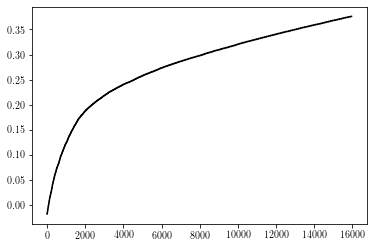

In [360]:
jk_sample = df_mid['JK'].to_numpy()
jk_sample.sort()

plt.plot(np.arange(len(jk_sample)), jk_sample, 'k')

make sure for each interval, the midplane has at least 1000 stars

In [361]:
len(np.unique(jk_sample)),len(jk_sample)

(15949, 15949)

In [362]:
jk_edge = np.linspace(jk_sample.min(), jk_sample.max(), 100_000)
jk_bound = []
b0 = BA
for i, b1 in enumerate(jk_edge):
    mask = (jk_sample < b1) & (jk_sample >= b0)
    count = jk_sample[mask].shape[0]
    if (count > 1000):
        print(f"[{b0},{b1}: {count}]")
        jk_bound.append([b0, b1])
        b0 = b1
jk_bound[-1][-1] = GG
print(len(jk_bound))

[-0.019000000000000003,0.12400286930852737: 1006]
[0.12400286930852737,0.1880009462012317: 1014]
[0.1880009462012317,0.21900118439564148: 1027]
[0.21900118439564148,0.2410023702214656: 1014]
[0.2410023702214656,0.2590004749586369: 1033]
[0.2590004749586369,0.2750009791919234: 1049]
[0.2750009791919234,0.28800311264916184: 1032]
[0.28800311264916184,0.3000005357937955: 1038]
[0.3000005357937955,0.31200189897887076: 1060]
[0.31200189897887076,0.3230024918917828: 1001]
[0.3230024918917828,0.33300231453253165: 1007]
[0.33300231453253165,0.34300213717328054: 1028]
[0.34300213717328054,0.3530019598140294: 1067]
[0.3530019598140294,0.36200101218261505: 1044]
[0.36200101218261505,0.3710040045916423: 1003]
15


In [369]:
jk_bound

[[-0.019000000000000003, 0.12400286930852737],
 [0.12400286930852737, 0.1880009462012317],
 [0.1880009462012317, 0.21900118439564148],
 [0.21900118439564148, 0.2410023702214656],
 [0.2410023702214656, 0.2590004749586369],
 [0.2590004749586369, 0.2750009791919234],
 [0.2750009791919234, 0.28800311264916184],
 [0.28800311264916184, 0.3000005357937955],
 [0.3000005357937955, 0.31200189897887076],
 [0.31200189897887076, 0.3230024918917828],
 [0.3230024918917828, 0.33300231453253165],
 [0.33300231453253165, 0.34300213717328054],
 [0.34300213717328054, 0.3530019598140294],
 [0.3530019598140294, 0.36200101218261505],
 [0.36200101218261505, 0.376]]

In [370]:
np.save(join(root_data_dir, 'boundaries.npy'), jk_bound)

In [371]:
zb = 300.0
zb

300.0

In [372]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Color'

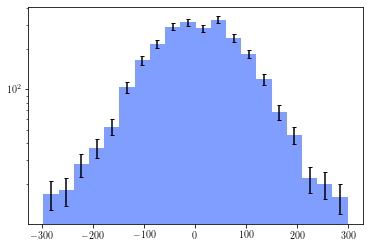

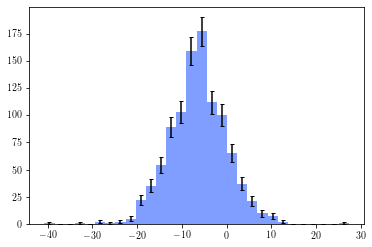

gaia_(-0.019)_(0.124).hdf5 total: 2564 200pc: 2422 mid: 1006


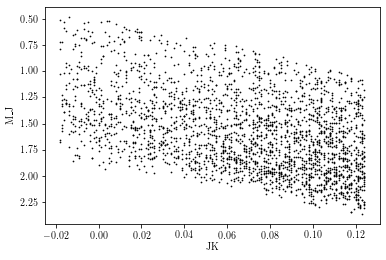

export(hdf5) [########################################] 100.00% elapsed time  :     8.08s =  0.1m =  0.0h   
 

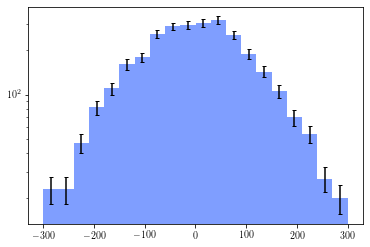

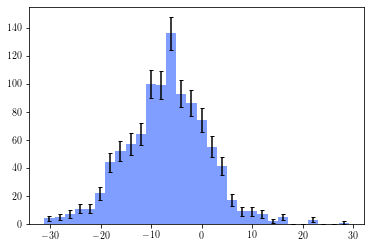

gaia_(0.124)_(0.188).hdf5 total: 2953 200pc: 2719 mid: 1014


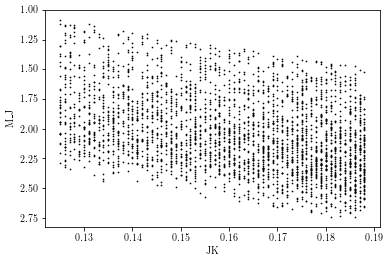

export(hdf5) [########################################] 100.00% elapsed time  :     7.98s =  0.1m =  0.0h   
 

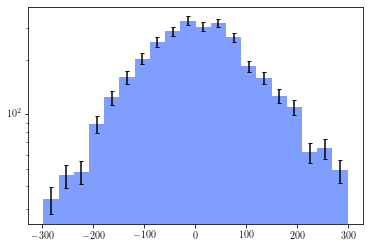

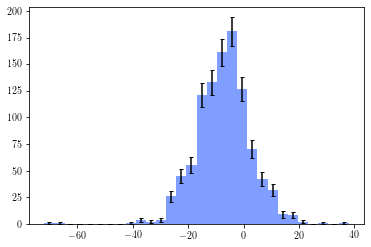

gaia_(0.188)_(0.219).hdf5 total: 3216 200pc: 2867 mid: 1027


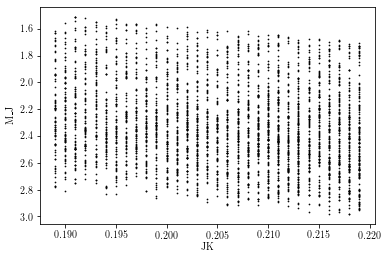

export(hdf5) [########################################] 100.00% elapsed time  :     7.88s =  0.1m =  0.0h    
 

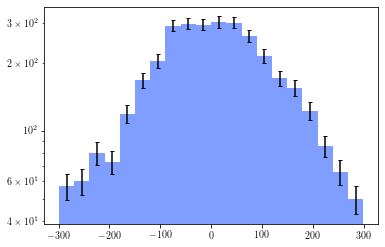

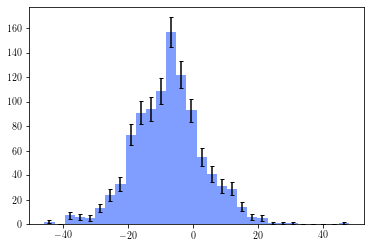

gaia_(0.219)_(0.241).hdf5 total: 3378 200pc: 2919 mid: 1014


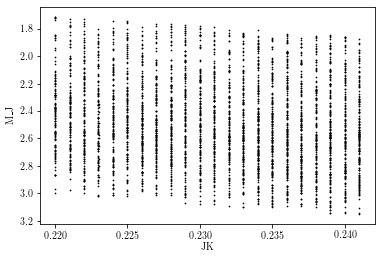

export(hdf5) [########################################] 100.00% elapsed time  :     7.92s =  0.1m =  0.0h 
 

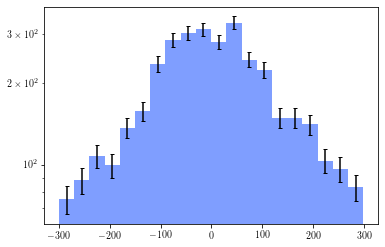

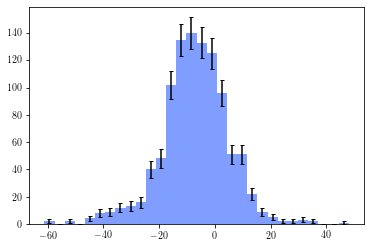

gaia_(0.241)_(0.259).hdf5 total: 3605 200pc: 2970 mid: 1033


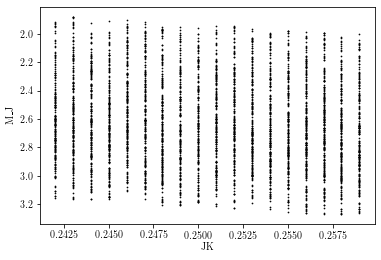

export(hdf5) [########################################] 100.00% elapsed time  :     7.96s =  0.1m =  0.0h  
 

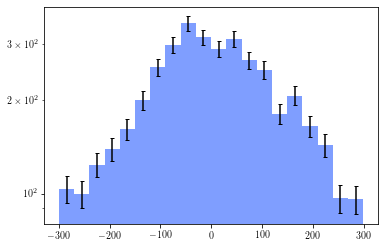

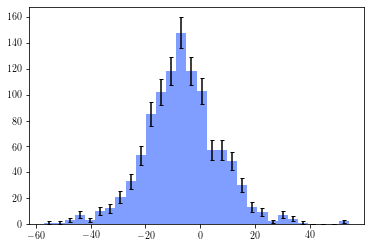

gaia_(0.259)_(0.275).hdf5 total: 4053 200pc: 3291 mid: 1049


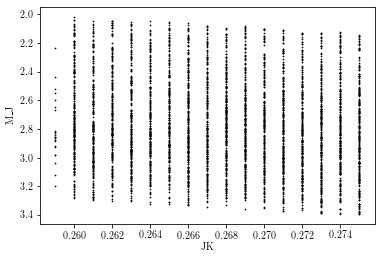

export(hdf5) [########################################] 100.00% elapsed time  :     8.01s =  0.1m =  0.0h     
 

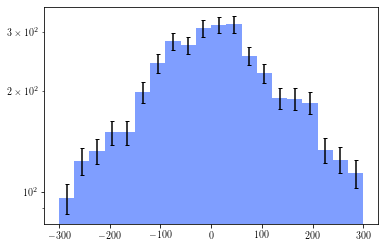

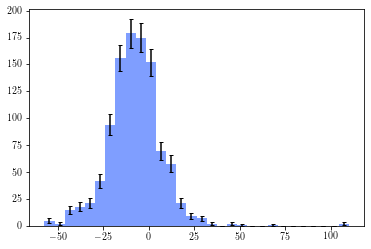

gaia_(0.275)_(0.288).hdf5 total: 4011 200pc: 3165 mid: 1032


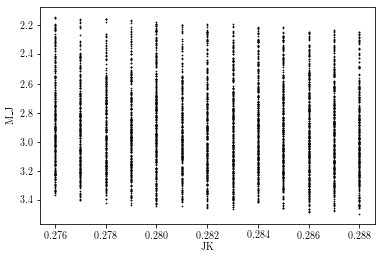

export(hdf5) [########################################] 100.00% elapsed time  :     8.29s =  0.1m =  0.0h   
 

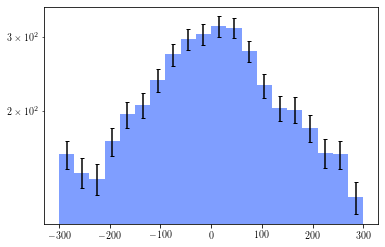

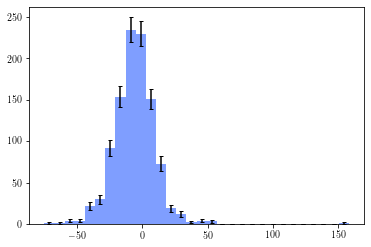

gaia_(0.288)_(0.300).hdf5 total: 4287 200pc: 3315 mid: 1038


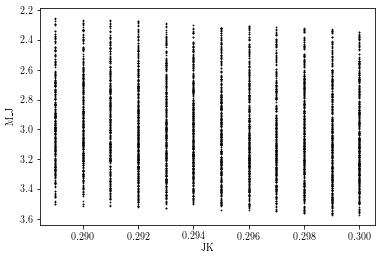

export(hdf5) [########################################] 100.00% elapsed time  :     7.94s =  0.1m =  0.0h    
 

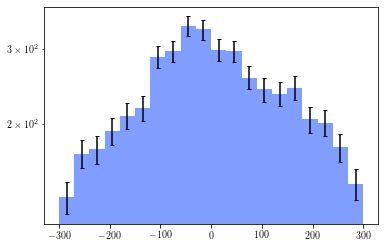

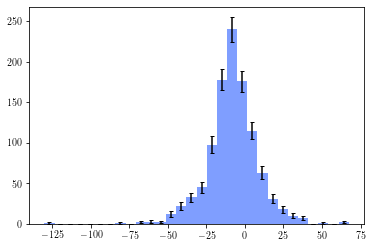

gaia_(0.300)_(0.312).hdf5 total: 4654 200pc: 3523 mid: 1060


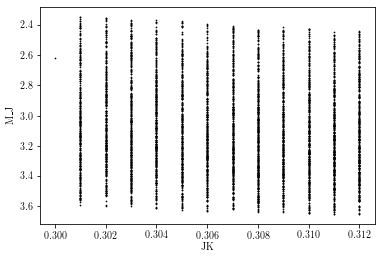

export(hdf5) [########################################] 100.00% elapsed time  :     7.91s =  0.1m =  0.0h  
 

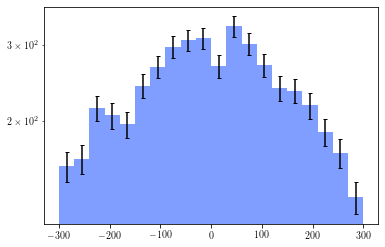

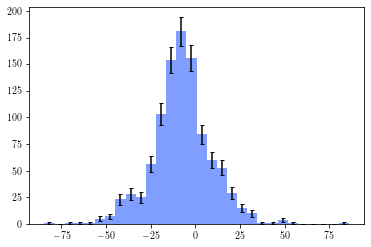

gaia_(0.312)_(0.323).hdf5 total: 4708 200pc: 3546 mid: 1001


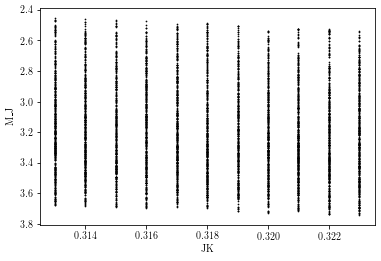

export(hdf5) [########################################] 100.00% elapsed time  :     7.95s =  0.1m =  0.0h  
 

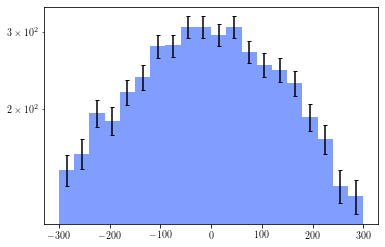

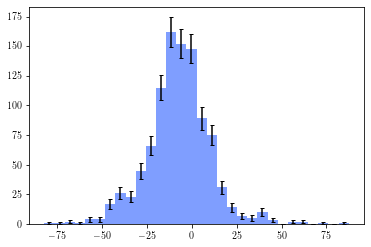

gaia_(0.323)_(0.333).hdf5 total: 4547 200pc: 3493 mid: 1007


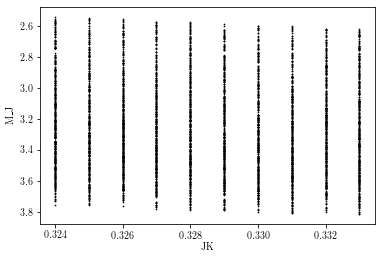

export(hdf5) [########################################] 100.00% elapsed time  :     8.30s =  0.1m =  0.0h    
 

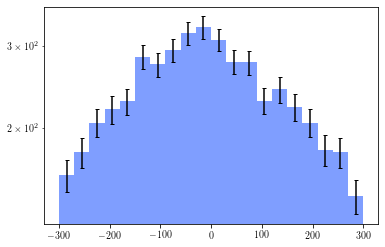

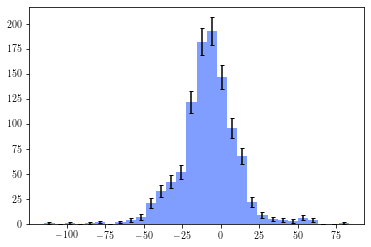

gaia_(0.333)_(0.343).hdf5 total: 4751 200pc: 3580 mid: 1028


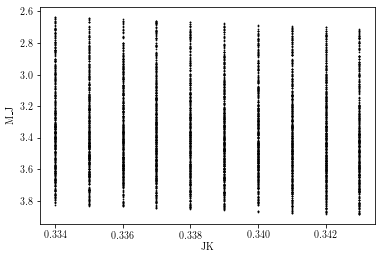

export(hdf5) [########################################] 100.00% elapsed time  :     7.87s =  0.1m =  0.0h   
 

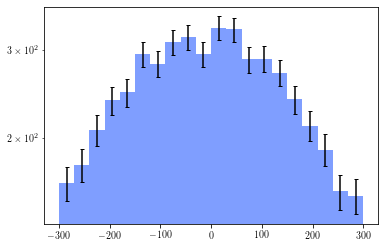

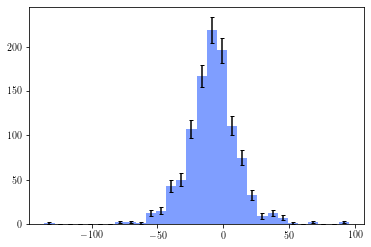

gaia_(0.343)_(0.353).hdf5 total: 4987 200pc: 3803 mid: 1067


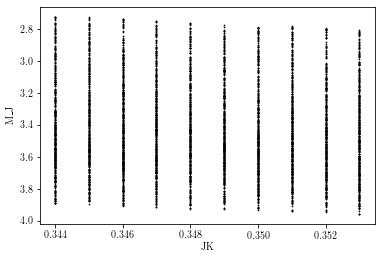

export(hdf5) [########################################] 100.00% elapsed time  :     8.05s =  0.1m =  0.0h      
 

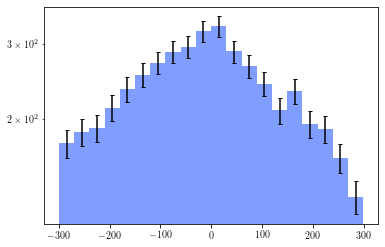

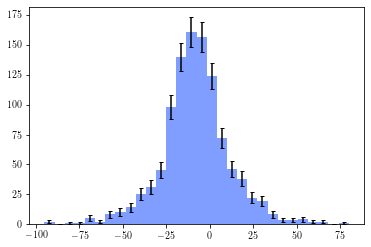

gaia_(0.353)_(0.362).hdf5 total: 4678 200pc: 3517 mid: 1044


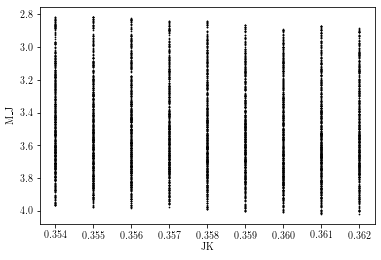

export(hdf5) [########################################] 100.00% elapsed time  :     7.97s =  0.1m =  0.0h   
 

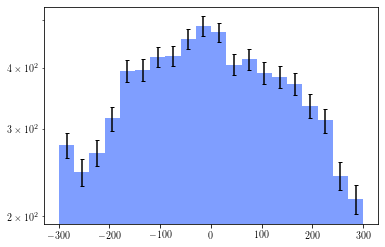

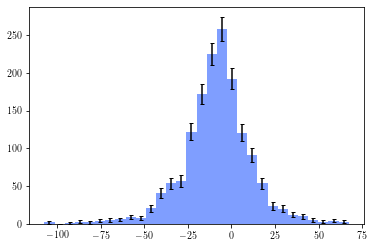

gaia_(0.362)_(0.376).hdf5 total: 7234 200pc: 5460 mid: 1529


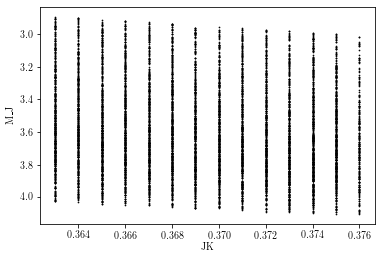

export(hdf5) [########################################] 100.00% elapsed time  :     8.02s =  0.1m =  0.0h   
 

In [373]:
for jk_b in jk_bound:
    jk_low, jk_high = jk_b[0], jk_b[1]
    df_mask_i = df_mask.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}").filter("w > -9999")
    
    name = f"gaia_({jk_low:.3f})_({jk_high:.3f}).hdf5"
    zs = df_mask_i["z"].to_numpy()
    znum, zedge = np.histogram(zs, bins=20)
    zmid = (zedge[1:]+zedge[:-1])/2
    zerr = np.sqrt(znum)
    dz = np.diff(zedge)[0]
    plt.bar(zmid, znum, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.yscale("log")
    plt.show()
    df_mid_i = df_mask_i.filter("abs(z) < 50")
    df_mid_i = df_mid_i.extract()
    df_200_i = df_mask_i.filter("abs(z) < 200").extract()
    ws = df_mid_i["w"].to_numpy()
    wnum, wedge = np.histogram(ws, bins=30)
    wmid = (wedge[1:]+wedge[:-1])/2
    werr = np.sqrt(wnum)
    dw = np.diff(wedge)[0]
    plt.bar(wmid, wnum, yerr=werr, width=dw, alpha=0.5, capsize=2)
    plt.show()
    print(name, f"total: {len(df_mask_i)}", f"200pc: {len(df_200_i)}", f"mid: {len(df_mid_i)}")
    df_mask_i.viz.scatter("JK", "M_J", c='k', alpha=1, s=0.5, length_check=False)
    plt.gca().invert_yaxis()
    plt.show()
    df_mask_i.export(join(data_dir, name), progress=True)
    # break